<a href="https://colab.research.google.com/github/Ollldman/ml_dl_experiments/blob/main/5_Friday_DImensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0. Рекомендации:**

Такой план подойдёт для инженера машинного обучения, исследователя данных или аналитика, который хочет визуализировать данные, понять их структуру и выбрать оптимальный метод снижения размерности.

---

## 🎯 **План: Снижение размерности и визуализация на датасете `digits`**

---

### 🔍 **1. Постановка задачи и цели**

#### Цель:
- Исследовать структуру данных рукописных цифр (0–9).
- Визуализировать многомерные данные в 2D.
- Сравнить методы снижения размерности: **PCA**, **t-SNE**, **UMAP**.
- Оценить, насколько хорошо каждый метод сохраняет кластерную структуру.

> 💡 Задача не предсказательная, а **исследовательская / визуализационная**.

---

### 📦 **2. Загрузка и изучение данных**

```python
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target  # X: (1797, 64), y: (1797,)
```

#### Анализ:
- Размер данных: 1797 образцов, 8×8 пикселей → 64 признака.
- Классы: 10 цифр (0–9).
- Проверить баланс классов: `np.bincount(y)`
- Посмотреть несколько изображений: `matplotlib.pyplot.imshow(X[0].reshape(8,8), cmap='gray')`

---

### 🧹 **3. Предобработка данных**

- **Масштабирование**:  
  PCA, t-SNE, UMAP чувствительны к масштабу → использовать `StandardScaler`.

```python
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
```

- **Обработка пропусков**: не требуется (чистые данные).
- **Выбросы**: визуально оценить через проекции.

---

### 📉 **4. Применение PCA (Principal Component Analysis)**

#### Цель:
- Оценить, сколько дисперсии объясняется признаками.
- Получить линейную проекцию в 2D.

#### Шаги:
1. Обучить PCA:
```python
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
```
2. Оценить объяснённую дисперсию:
```python
print(pca.explained_variance_ratio_)  # ~0.14 + 0.13 → 27% общей дисперсии
```
3. Построить график:
   - Цвет — метка класса (цифра).
   - Подписать легенду.

#### Интерпретация:
- PCA сохраняет **глобальную структуру** и **дисперсию**.
- Может плохо разделять кластеры, если структура нелинейна.

---

### 🌀 **5. t-SNE (t-Distributed Stochastic Neighbor Embedding)**

#### Цель:
- Сохранить **локальную структуру** (соседей).
- Получить интуитивную 2D-визуализацию кластеров.

#### Шаги:
```python
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
```

#### Ключевые параметры:
- `perplexity`: аналог "локальности" (5–50). Протестировать: 5, 30, 50.
- `n_iter`: достаточно 1000.
- `learning_rate`: можно подбирать (default: 200).
- `random_state`: для воспроизводимости.

#### Плюсы:
- Отлично визуализирует кластеры.
- Хорошо разделяет классы.

#### Минусы:
- Не сохраняет расстояния между кластерами.
- Чувствителен к параметрам.
- Не подходит для инференса на новых данных.

---

### 🌐 **6. UMAP (Uniform Manifold Approximation and Projection)**

#### Цель:
- Альтернатива t-SNE: быстрее, сохраняет и локальную, и **глобальную структуру**.

#### Шаги:
```python
import umap
reducer = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = reducer.fit_transform(X_scaled)
```

#### Ключевые параметры:
- `n_neighbors`: количество соседей (аналог perplexity). По умолчанию 15.
- `min_dist`: минимальное расстояние между точками (0.01–0.5).
- `metric`: можно менять (евклидово, косинус и др.).

#### Плюсы:
- Быстрее t-SNE.
- Сохраняет больше глобальной топологии.
- Можно использовать для новых данных (`transform`).

---

### 🖼️ **7. Визуализация и сравнение методов**

Создать **панель из 3 графиков** (subplots):

```python
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, X_emb, title in zip(axes, [X_pca, X_tsne, X_umap], ['PCA', 't-SNE', 'UMAP']):
    scatter = ax.scatter(X_emb[:, 0], X_emb[:, 1], c=y, cmap='tab10', s=5)
    ax.set_title(title)
    ax.axis('equal')  # одинаковый масштаб осей
fig.colorbar(scatter, ax=axes, location='bottom', shrink=0.6)
plt.show()
```

#### Что сравнивать:
| Критерий | PCA | t-SNE | UMAP |
|--------|-----|-------|------|
| Разделение кластеров | Слабое | Отличное | Очень хорошее |
| Глобальная структура | Сохранена | Искажена | Частично сохранена |
| Скорость | Очень быстро | Медленно | Быстро |
| Интерпретируемость | Высокая (через компоненты) | Низкая | Средняя |
| Воспроизводимость | Да | Да (при `random_state`) | Да |
| Использование на новых данных | Да | Нет (без `transform`) | Да |

---

### 📊 **8. Количественная оценка качества проекций**

Так как нет "истинной" 2D-структуры, используем **качественные и косвенные метрики**:

#### 1. **Trustworthiness и Continuity** (оценивают, насколько сохраняются соседи)
```python
from sklearn.manifold import trustworthiness
print("Trustworthiness:")
print(f"PCA: {trustworthiness(X_scaled, X_pca, n_neighbors=5):.3f}")
print(f"t-SNE: {trustworthiness(X_scaled, X_tsne, n_neighbors=5):.3f}")
print(f"UMAP: {trustworthiness(X_scaled, X_umap, n_neighbors=5):.3f}")
```

> Чем ближе к 1 — тем лучше.

#### 2. **Silhouette Score** в 2D-пространстве (качество кластеризации)
```python
from sklearn.metrics import silhouette_score
print(silhouette_score(X_pca, y))  # и аналогично для t-SNE, UMAP
```

> Высокий score — кластеры плотные и хорошо разделены.

---

### 🔍 **9. Интерпретация результатов**

- **PCA**: показывает, что данные сильно перекрываются в линейных компонентах. Не разделяет классы чётко.
- **t-SNE**: отлично разделяет цифры на кластеры (особенно 0, 1, 4). Но кластеры могут "плавать".
- **UMAP**: почти как t-SNE, но более компактные кластеры, лучше видна глобальная структура (например, "кольцо" цифр).

> 💡 Вывод: **UMAP и t-SNE — лучшие для визуализации**, PCA — для интерпретации и предобработки.

---

### 🛠️ **10. Дополнительные возможности**

- **PCA как предобработка перед t-SNE/UMAP**:
  ```python
  X_pca_50 = PCA(n_components=50).fit_transform(X_scaled)
  X_tsne = TSNE(...).fit_transform(X_pca_50)  # Быстрее и стабильнее
  ```
- **3D-проекции**: `n_components=3` + `mpl_toolkits.mplot3d`.
- **Анимация**: изменение `perplexity` или `n_neighbors` (через `matplotlib.animation`).

---

### ✅ **Чек-лист**

- [ ] Данные загружены и изучены.
- [ ] Проведено масштабирование.
- [ ] PCA построен, объяснённая дисперсия оценена.
- [ ] t-SNE и UMAP обучены с разумными параметрами.
- [ ] Все три проекции визуализированы на одном графике.
- [ ] Проведено сравнение по trustworthiness и silhouette.
- [ ] Сделаны выводы о применимости каждого метода.

---

### 📚 Рекомендации

- **PCA** — когда нужна интерпретируемость, скорость, или снижение размерности перед обучением модели.
- **t-SNE** — для публикаций, отчётов, когда важна визуальная ясность.
- **UMAP** — лучший компромисс: быстрее t-SNE, сохраняет больше структуры, поддерживает инференс.

---

# **1. Начало**

Седалем базовый импорт - загрузим набор данных, посмотрим на него, оценим, почему нам необходим PCA и какие задачи нам нужно решать.

In [1]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data:
data = load_digits(as_frame=True)

In [3]:
features = data.data
targets = data.target

features.shape, targets.shape

((1797, 64), (1797,))

In [4]:
features.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [5]:
targets.head()

,target
0,0
1,1
2,2
3,3
4,4


Взглянем на баланс классов:

[178 182 177 183 181 182 181 179 174 180]


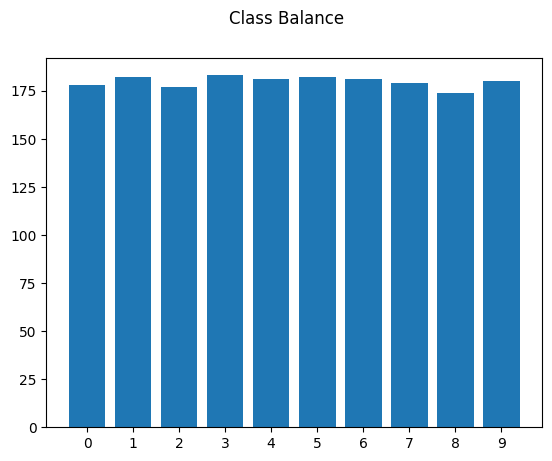

In [6]:
# class balance:
print(np.bincount(targets))

plt.bar(x=np.arange(10), height=np.bincount(targets))
plt.xticks(ticks=np.arange(10))
plt.suptitle("Class Balance")
plt.show()

Посмотрим на пример объекта:

<Figure size 640x480 with 0 Axes>

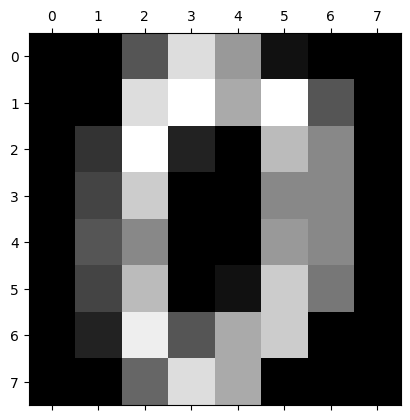

In [7]:
plt.gray()

plt.matshow(data.images[0])
plt.show()

Посокльку методы снижения размерности, которые мы будем применять чувствительны к масштабам признаков, мы вынуждены произвести шкалирование.

In [8]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features, targets)
scaled_data[:1]

array([[ 0.        , -0.33501649, -0.04308102,  0.27407152, -0.66447751,
        -0.84412939, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
         0.4829745 ,  0.75962245, -0.05842586,  1.12772113,  0.87958306,
        -0.13043338, -0.04462507,  0.11144272,  0.89588044, -0.86066632,
        -1.14964846,  0.51547187,  1.90596347, -0.11422184, -0.03337973,
         0.48648928,  0.46988512, -1.49990136, -1.61406277,  0.07639777,
         1.54181413, -0.04723238,  0.        ,  0.76465553,  0.05263019,
        -1.44763006, -1.73666443,  0.04361588,  1.43955804,  0.        ,
        -0.06134367,  0.8105536 ,  0.63011714, -1.12245711, -1.06623158,
         0.66096475,  0.81845076, -0.08874162, -0.03543326,  0.74211893,
         1.15065212, -0.86867056,  0.11012973,  0.53761116, -0.75743581,
        -0.20978513, -0.02359646, -0.29908135,  0.08671869,  0.20829258,
        -0.36677122, -1.14664746, -0.5056698 , -0.19600752]])

## **Base-line model**

Для начала построим base-line модель, чтобы первоначально оценить от чего мы отталкиваемся совершая некоторые манипуляции. Применим для классификации решающее дерево:

In [9]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    targets,
                                                    test_size=0.2,
                                                    random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
predict = model.predict(X_test)

print(classification_report(y_test, predict, labels=np.arange(10)))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        33
           1       0.92      0.79      0.85        28
           2       0.93      0.79      0.85        33
           3       0.75      0.88      0.81        34
           4       0.86      0.91      0.88        46
           5       0.91      0.91      0.91        47
           6       0.92      0.97      0.94        35
           7       0.77      0.88      0.82        34
           8       0.83      0.67      0.74        30
           9       0.78      0.80      0.79        40

    accuracy                           0.86       360
   macro avg       0.86      0.85      0.85       360
weighted avg       0.86      0.86      0.85       360



<Axes: >

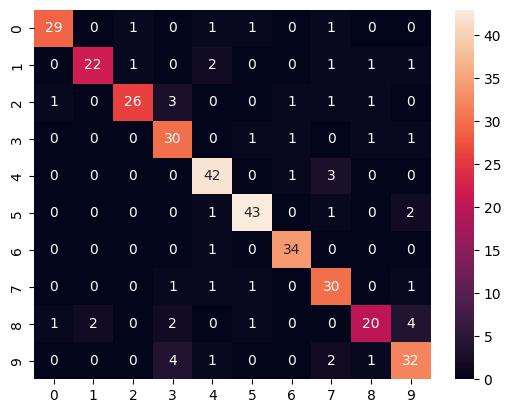

In [11]:
sns.heatmap(confusion_matrix(y_test, predict, labels=np.arange(10)),
            annot=True)

Base-line модель показывает хорошие результаты. Мы никак не обрабатываем данные, не изменяем их явно и получаем неплохое качество на решающем дереве.
Какие параметры установились у модели?

In [12]:
print(f'Глубина дерева: {model.get_depth()}')
print(f'Максимально усвоенное число признаков в дереве: {model.max_features_}')

Глубина дерева: 15
Максимально усвоенное число признаков в дереве: 64


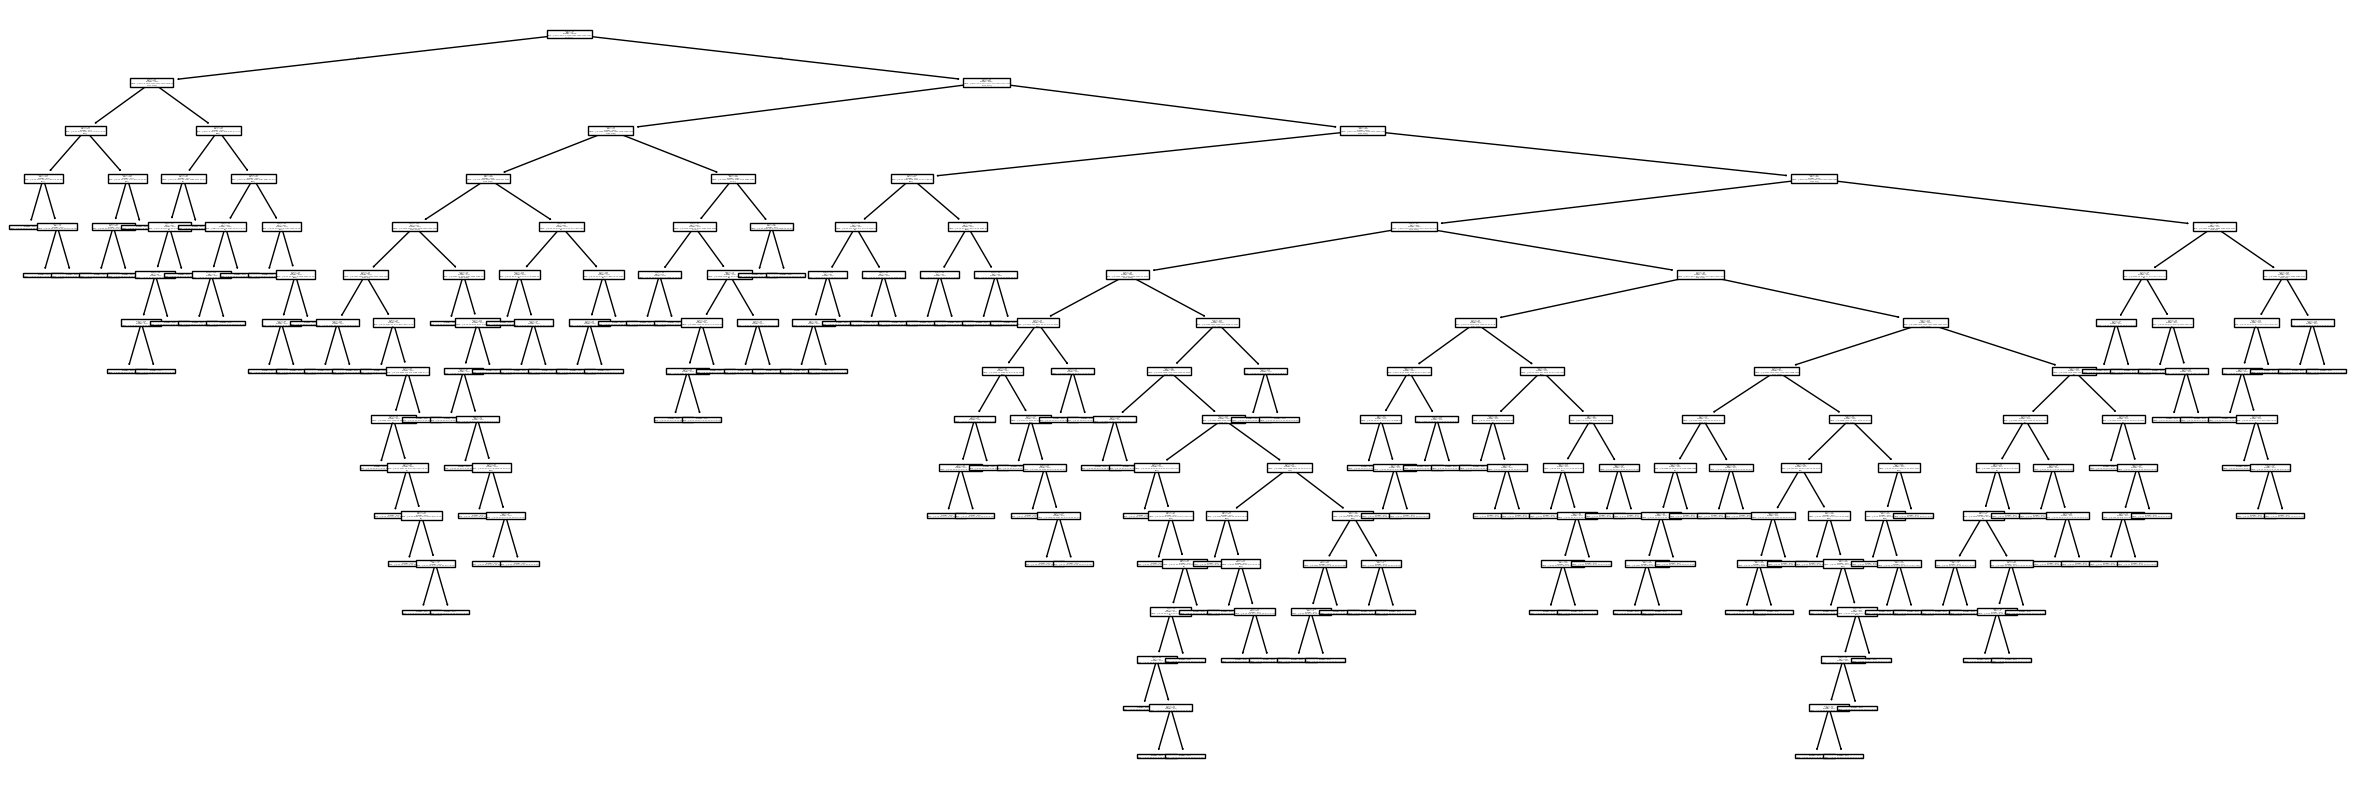

In [13]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(30, 10))
plot_tree(model, proportion=True)
plt.show()

## **Промежуточные выводы**
- **1)** Набор данных состоит из представления цифр в пиксельной сетке 8 на 8, где каждому пикселу соответствует свой код числа, по всей видимости в гамме цвета.

- **2)** Матрица признаков в 64 мерном пространстве вещественных чисел. Для классических моделей это довольно большая размерность. Например, для KNN мы явно попадем в проблему высокой размерности и не сможем корректно усваивать кластеры классов, хотя это можно и проверить.

- **3)** Классы распределены в наборе данных достаточно равномерно, на каждый приходится более 150 объектов.

- **4)** Base-line модель решающее дерево показывает хороший результат классификации и выполняет это довольно быстро на предоставленном железе.

## **Выдвигаем гипотезы**

**1)** Снижение размерности данных можно выполнить без сильной потери качества классификации. (Скорее всего на большинстве объектных матриц 8*8 можно наблюдать зоны с нулевыми значениеями вдоль краев, такие признаки не должны нести важной информации для обучения)

**2)** Классы 0, 1, 2, 4, 7, 9 лучше всего поддаются отличию из-за большой разницы в написании.

# **2. PCA**

In [14]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_data)
X_pca.shape

(1797, 2)

In [15]:
print(pca.explained_variance_ratio_)

[0.12033916 0.09561054]


Итак, компоненты объясняют около 21% всей дисперсии данных, это мало, но и надо понимать, что мы с 64 размерного пространства опустились в трехмерное.

In [16]:
X_pca[:2]

array([[-1.91421366, -0.95450157],
       [-0.58898033,  0.9246358 ]])

In [17]:
my_cmap = sns.mpl_palette('Set3', n_colors=10)


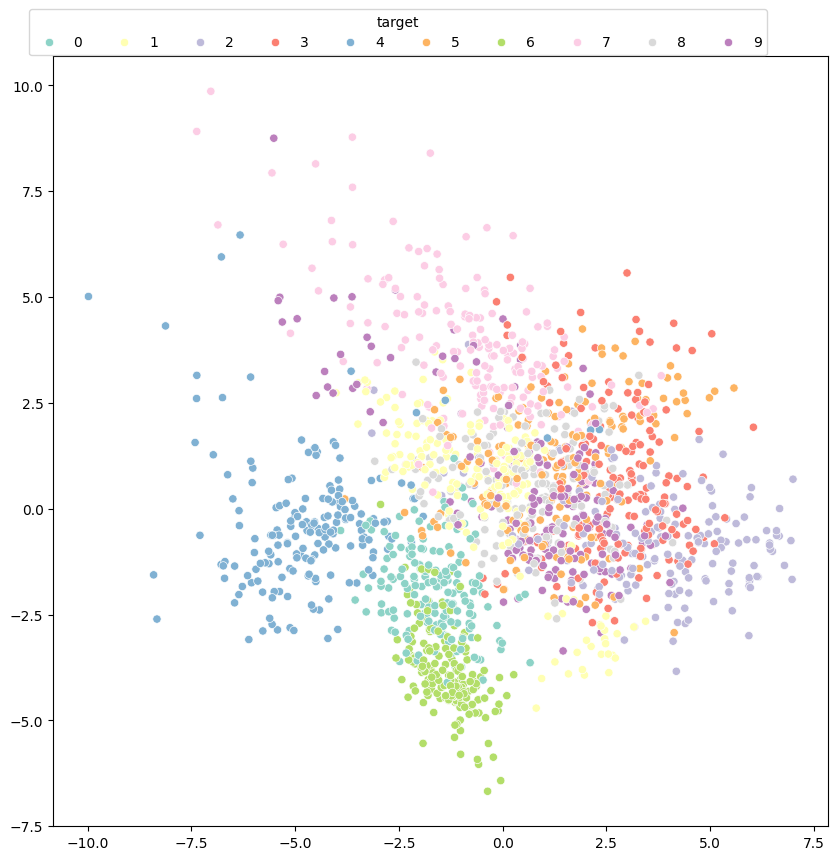

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.scatterplot(x=X_pca[:, 0],
                y=X_pca[:, 1],
                hue=targets,
                palette=my_cmap,
                sizes=(20, 200))
sns.move_legend(
    ax,
    "upper left",
    bbox_to_anchor=(-0.04, 1.07),
    ncols=10)
plt.show()

Как можно увидеть, данные довольно трудно подать для классификации в ядерные методы, или иные, те же линейные методы. Та тень в двумерное пространство, что мы получаем, применяя PCA, говорит о том, что разделимость лежит где-то в большей размерности. Все, что мы еще можем позволить себе - построить трехмерный график для 3 компонент, но это не даст много информации.
Давайте оценим оптимальное снижение размерности:

Сколько компонент нам нужно, чтобы объяснить большую часть дисперсии данных?

In [19]:
for i in range(1, 51, 10):
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(scaled_data)
    print(f'n_components: {i}, - explained variance ratio - {pca.explained_variance_ratio_.sum()}')

n_components: 1, - explained variance ratio - 0.12033916097734909
n_components: 11, - explained variance ratio - 0.6165556080085328
n_components: 21, - explained variance ratio - 0.8066173226822598
n_components: 31, - explained variance ratio - 0.90046425975866
n_components: 41, - explained variance ratio - 0.9548396432064368


Как можно видеть, без сильной потери можно уменьшить размерность с 64 до 41 признаков. Для этой задачи это может быть не критично, однако, это интересно.